# Building A Logistic Regression in Python, Step by Step

In [1]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

### Import modules

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

H:\Data\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualisation Settings

In [3]:
%matplotlib inline

sns.set(rc={'figure.figsize':(7,5.5)})
sns.set_style('whitegrid')
sns.set_palette('Set3')

### Logistic Regression Assumptions

In [4]:
#  Binary logistic regression requires the dependent variable to be binary.
#  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#  Only the meaningful variables should be included.
#  The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#  The independent variables are linearly related to the log odds.
#  Logistic regression requires quite large sample sizes.

### Data

In [5]:
data = pd.read_csv(r"H:\Data\daniel_corcoran_python_files\datasets\portugese_bank_institution_ml.csv")

In [6]:
data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].head(6) #first 11 columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68


In [7]:
data.iloc[:,[11,12,13,14,15,16,17,18,19,20]].head(6) #last 10 columns

,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0


In [8]:
for column in data.columns:
    unique_values = data[column].value_counts().count()
    print(str(column) +' has '+ str(unique_values) + ' unique values.')

age has 78 unique values.
job has 12 unique values.
marital has 4 unique values.
education has 8 unique values.
default has 3 unique values.
housing has 3 unique values.
loan has 3 unique values.
contact has 2 unique values.
month has 10 unique values.
day_of_week has 5 unique values.
duration has 1544 unique values.
campaign has 42 unique values.
pdays has 27 unique values.
previous has 8 unique values.
poutcome has 3 unique values.
emp_var_rate has 10 unique values.
cons_price_idx has 26 unique values.
cons_conf_idx has 26 unique values.
euribor3m has 316 unique values.
nr_employed has 11 unique values.
y has 2 unique values.


In [9]:
data["y"].unique()

array([0, 1], dtype=int64)

### Meeting condition 1: No Nulls

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

### Meeting condition 2: Sufficient Records

In [11]:
data.shape

(41188, 21)

In [12]:
# condition is 50 records per variable, we have 1961 per variable.

### Meeting condition 3: Target is binary or ordinal

In [13]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [14]:
#there are only 2 values in the target varible, target is binary.

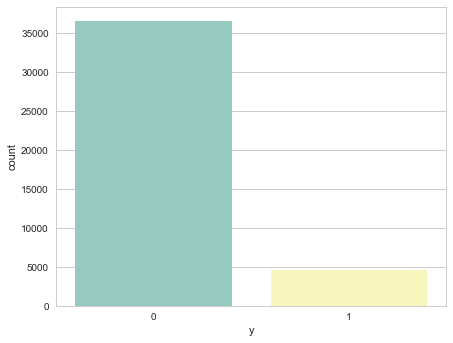

In [15]:
sns.countplot(data = data, x = 'y')

### Meeting condition 4: Little to no multicollinearity

### Education column has too many categories

In [16]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [17]:
data['education'].replace(['basic.4y', 'basic.9y', 'basic.6y'],'basic',inplace = True)

In [18]:
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data Exploration

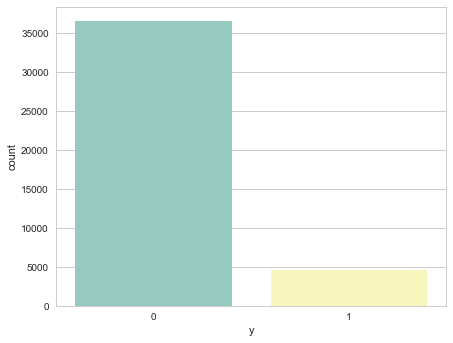

In [19]:
sns.countplot(data= data, x = 'y')

In [20]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Observations

In [21]:
# average age is higher for those who bought a deposit
# number campaigns is lower for those who bought a deposit
# days since last call is lower for those who bought deposit

### Visualizations

Text(0.5,1,'job comparison')

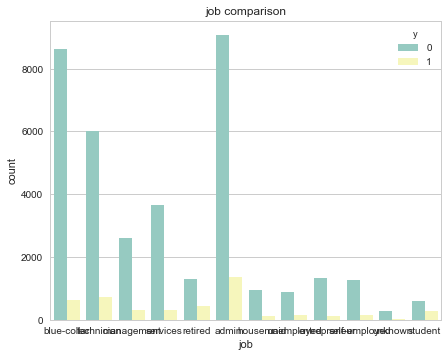

In [22]:
sns.countplot(data = data, x = 'job', hue = 'y')
plt.title("job comparison")

Text(0.5,1,'marital comparison')

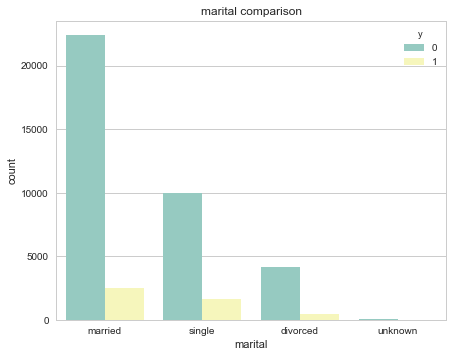

In [23]:
sns.countplot(data = data, x = 'marital', hue = 'y')
plt.title("marital comparison")


Text(0,0.5,'frequency')

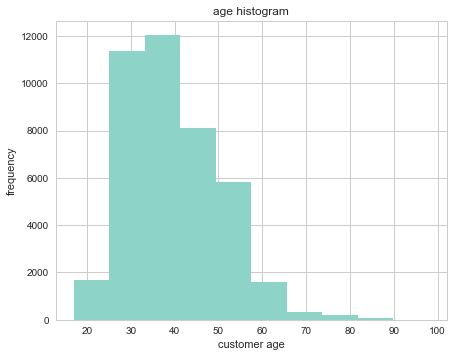

In [24]:
data.age.hist()
plt.title("age histogram")
plt.xlabel("customer age")
plt.ylabel("frequency")

In [25]:
#most customers are in the 30-40 range

In [26]:
cutted = pd.cut(data['age'], 15)
cutted.value_counts()

(27.8, 33.2]      9794
(33.2, 38.6]      8166
(38.6, 44.0]      7079
(44.0, 49.4]      4879
(49.4, 54.8]      3825
(54.8, 60.2]      3320
(22.4, 27.8]      2836
(16.919, 22.4]     379
(60.2, 65.6]       291
(65.6, 71.0]       250
(71.0, 76.4]       158
(76.4, 81.8]       112
(81.8, 87.2]        65
(87.2, 92.6]        30
(92.6, 98.0]         4
Name: age, dtype: int64

### Creating Dummy Variables

In [27]:
#converting categorical columns into binary columns

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']

for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix = var, drop_first = True)
    data1 = data.join(cat_list)
    data = data1

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [29]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

### Feature Selection (RFE) 

In [30]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [31]:
#using recursive feature elimination to remove irrelevant columns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18) #where 18 is features to be selected
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

H:\Data\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True  True False False False False  True  True
 False False  True False  True  True False False False False False False
 False False False False False  True False False False False False  True
  True  True  True False  True  True  True False False  True False False
 False  True  True]
[27 19  9 31  1  1 14 13 23 16  1  1 28 30  1  5  1  1 24 17 34 18  8 32 25
 29 11  4  2  1 33 20 10 21 12  1  1  1  1 15  1  1  1 26 22  1  6  7  3  1
  1]


In [32]:
rfe_support_list = rfe.support_.tolist()
print(rfe_support_list)

[False, False, False, False, True, True, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, False, True, True, True, False, False, True, False, False, False, True, True]


### Collecting relevant columns

In [33]:
data_final_columns = data_final[X].columns.tolist()

for n in range(len(rfe_support_list)):
    
    print(str(rfe_support_list[n]) +" : "+  data_final_columns[n])


False : age
False : duration
False : campaign
False : pdays
True : previous
True : emp_var_rate
False : cons_price_idx
False : cons_conf_idx
False : euribor3m
False : nr_employed
True : job_blue-collar
True : job_entrepreneur
False : job_housemaid
False : job_management
True : job_retired
False : job_self-employed
True : job_services
True : job_student
False : job_technician
False : job_unemployed
False : job_unknown
False : marital_married
False : marital_single
False : marital_unknown
False : education_high.school
False : education_illiterate
False : education_professional.course
False : education_university.degree
False : education_unknown
True : default_unknown
False : default_yes
False : housing_unknown
False : housing_yes
False : loan_unknown
False : loan_yes
True : contact_telephone
True : month_aug
True : month_dec
True : month_jul
False : month_jun
True : month_mar
True : month_may
True : month_nov
False : month_oct
False : month_sep
True : day_of_week_mon
False : day_of_week_

In [34]:
relevant_columns = []
for n in range(len(rfe_support_list)):
    if rfe_support_list[n] == True:
        relevant_columns.append(data_final_columns[n])
relevant_columns

['previous',
 'emp_var_rate',
 'job_blue-collar',
 'job_entrepreneur',
 'job_retired',
 'job_services',
 'job_student',
 'default_unknown',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_nonexistent',
 'poutcome_success']

In [35]:
X = data_final[relevant_columns]
y = data_final['y']

### Implementing the model

In [36]:
# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# import statsmodels.api as sm
# logit_model = sm.Logit(y,X)
# results = logit_model.fit()
# print(results.summary())

In [37]:
#check that p values are less than 0.05

### Logistic Regression Model Fitting

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
for n in logreg.coef_.tolist():
    print(n)

[0.3408809512089083, -0.462695295881087, -0.23220857180877785, -0.19563868891954045, 0.4201372164426961, -0.13012788082958918, 0.45163134966211216, -0.3352799277829881, -0.1844800394208108, -0.23871686365608574, -0.1201816611221949, 0.1338978331070405, 0.8490274414063025, -0.8422555049686143, -0.5522054988812424, -0.26230187656276627, 0.6509071899366541, 1.8804659245069202]


In [40]:
logreg.intercept_

array([-2.54761074])

In [41]:
X.columns

Index(['previous', 'emp_var_rate', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'job_student', 'default_unknown',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_mar',
       'month_may', 'month_nov', 'day_of_week_mon', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [42]:
len(X.columns)

18

### Predicting test set results and calculating the accuracy

In [43]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [44]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


In [45]:
#if the accuracy remains close to the accuracy of the logistic regression classifier on test set above the model 'generalizes well'

### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[10861   120]
 [ 1112   264]]


In [47]:
# 10861 + 264 correct predictions
# 1112 + 120 incorrect predictions 

### Compute precision, recall, F-measure and support

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.69      0.19      0.30      1376

avg / total       0.88      0.90      0.87     12357



### ROC Curve

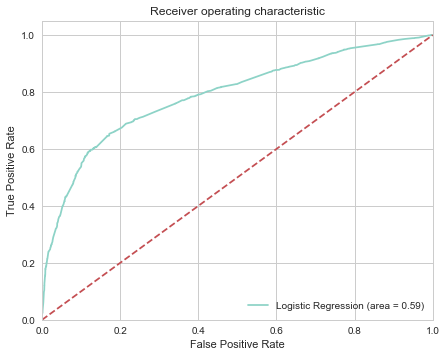

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


## Tests Below


In [50]:
testing_y = data_final['y']
testing_x = data_final['euribor3m']

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
test_logit_model = sm.Logit(testing_y,testing_x)
test_results = test_logit_model.fit()
print(test_results.summary())

H:\Data\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.311366
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41187
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.1155
Time:                        13:15:36   Log-Likelihood:                -12825.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
euribor3m     -0.6733      0.006   -110.990      0.000      -0.685      -0.661


In [ ]:
test_results

In [ ]:
test_results.params

In [ ]:
test_results.params.values

In [ ]:
import math
ce = -1.0862
x_axis = data_final['euribor3m']
y_axis = 1/(1+math.exp(1)**(-ce*x_axis))

In [ ]:
data_new = pd.concat([x_axis, y_axis], axis = 1)
data_new.columns = ["euribor3m","predicted"]
data_new.head(10)

In [ ]:
data_final.to_csv("datafinal2.csv")

In [ ]:
import pickle

In [ ]:
fn ="logreg.sav"
pickle.dump(logreg, open(fn,'wb'))